## Q1: The stock market

(This is about numba)

A Markov Chain is defined as a sequence of random variables where a parameter depends *only* on the preceding value. This is a crucial tool in statistics, widely used in science and beyond (economics for instance).

For instance, the stock market has phases of growing prices (bull), dreasing prices (bear) and recession. This would be a Markov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

where the numbers on the arrows indicate the probabily that the next day will be in a given state.

Your task is to simulate the stock market according to this rule. Start from a random state and simulate many many  iterations. If your code is right, the fraction of days in each state should converge. 

Implement a pure-python version and a numba version, and compare speeds. 


### Simple python version

The loop required: 3.9193828105926514 seconds


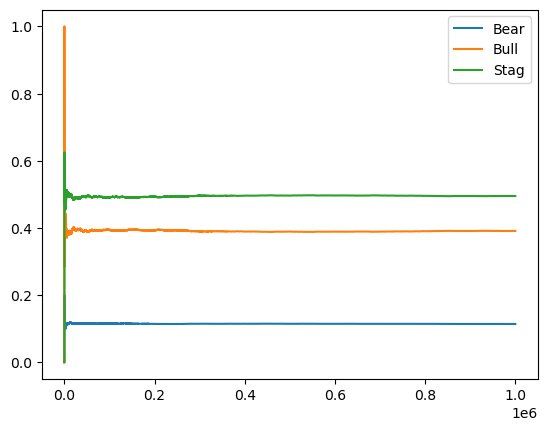

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import time

def cicle(iternum,values):
    BullCount=BearCount=StagCount=0
    state = round(np.random.uniform(0,2),0) #initial state
    
    for l in range(1,iternum):
        x=np.random.uniform()
        match state:
            case 0:
                if x<=0.25:      #move forward to Bull
                    state +=1
                    BullCount +=1
                
                elif x<0.5:    #move back to Bear
                    state +=2
                    BearCount+=1
                
                else:             #stay here
                    StagCount+=1
        
            case 1:
                if x<=0.075:     #move forward to Bear
                    state +=1
                    BearCount +=1
                elif x<0.1:     #move back to Stagnant
                    state -=1
                    StagCount+=1
                else:             #stay here
                    BullCount+=1
            
            case 2:
                if x<=0.05:      #move forward to Stagnant
                    state -=2
                    StagCount +=1
                elif x<0.15:    #move back to Bear
                    state -=2
                    BearCount+=1
                else:             #stay here
                    StagCount+=1                    
        values[0,l]=StagCount/l
        values[2,l]=BullCount/l
        values[1,l]=BearCount/l


iternum=1000000
values = np.zeros((3,iternum)) #0=stag, 1=bear, 2=bull        
        
start_time = time.time()    
cicle(iternum,values)
print("The loop required: %s seconds" % (time.time() - start_time))

plt.plot(values[1,:],label='Bear')   
plt.plot(values[2,:], label='Bull') 
plt.plot(values[0,:], label='Stag') 
plt.legend()
#cicle(state,iternum)

### njit version

The loop required: 0.4238605499267578 seconds


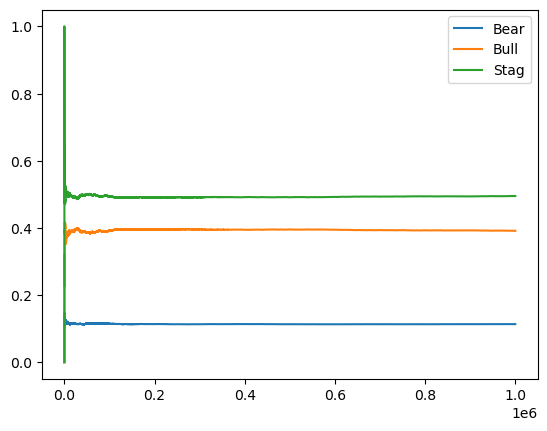

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import time

@njit
def fast_cicle(iternum,values):
    BullCount=BearCount=StagCount=0
    state = round(np.random.uniform(0,2),0) #initial state
    
    for l in range(1,iternum):
        x=np.random.uniform()
        match state:
            case 0:
                if x<=0.25:      #move forward to Bull
                    state +=1
                    BullCount +=1
                
                elif x<0.5:    #move back to Bear
                    state +=2
                    BearCount+=1
                
                else:             #stay here
                    StagCount+=1
        
            case 1:
                if x<=0.075:     #move forward to Bear
                    state +=1
                    BearCount +=1
                elif x<0.1:     #move back to Stagnant
                    state -=1
                    StagCount+=1
                else:             #stay here
                    BullCount+=1
            
            case 2:
                if x<=0.05:      #move forward to Stagnant
                    state -=2
                    StagCount +=1
                elif x<0.15:    #move back to Bear
                    state -=2
                    BearCount+=1
                else:             #stay here
                    StagCount+=1                    
        values[0,l]=StagCount/l
        values[2,l]=BullCount/l
        values[1,l]=BearCount/l

iternum=1000000
values = np.zeros((3,iternum)) #0=stag, 1=bear, 2=bull        
        
start_time = time.time() 
fast_cicle(iternum,values)
print("The loop required: %s seconds" % (time.time() - start_time))

plt.plot(values[1,:],label='Bear')   
plt.plot(values[2,:], label='Bull') 
plt.plot(values[0,:], label='Stag') 
plt.legend()
#cicle(state,iternum)

## Q2: Consistent plotting

(This is about python's dectorators)

Write a decorator for the plots of all your papers. 

- Remember a decorator takes a function. 
- This function in turn should return a matplotlib figure object.
- Before the function is called, the decorator should intialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
- After the figure it's done, the decorator should save it to pdf.

This is a great hack for your papers! You do this once and for all, and all plots in your paper will be beautifill, all with the same style/fontsize/etc. All you'll need to do is adding `@myplot` to the relevant plotting functions.  

NOTE: The wrapper plots the data from the previous exercise

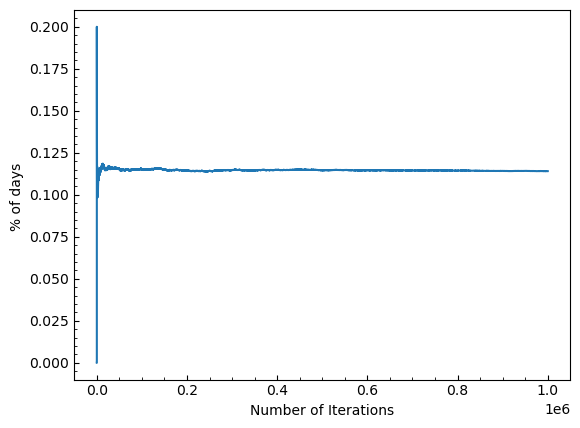

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def myplot(func,*args):
    def wrapper(*args):
        mpl.rcParams['xtick.labelsize']=10
        mpl.rcParams['ytick.labelsize']=10
        mpl.rcParams['font.family'] = 'sans-serif'
        mpl.rcParams['savefig.format'] = 'pdf'
        mpl.rcParams['savefig.dpi'] = 300
        mpl.rcParams['xtick.direction'] = 'in'
        mpl.rcParams['ytick.direction'] = 'in'
        mpl.rcParams['xtick.minor.visible'] = True
        mpl.rcParams['ytick.minor.visible'] = True
        func(*args)
    return wrapper

@myplot
def xyplot(x,y,name):
    plt.plot(x,y)
    plt.savefig(name)
    
def yplot(y,name):
    plt.plot(y)
    plt.savefig(name)
    
plt.xlabel('Number of Iterations')
plt.ylabel('% of days ')
yplot(values[1,:],'Bear_Market_Convergence')